<a href="https://colab.research.google.com/github/Aryamaan23/ML-TOOLBOX/blob/master/Copy_of_Assignment_9_Two_Layer_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction
- In this assignment, you will build a two layer neural network for classification from scratch using only numpy.
- Please refer to videos on Backpropagation and one reference material shared in additional resources for the understanding required to solve this assignment

In [ ]:
""" Some functions required for testing """
import numpy as np
import tensorflow.keras as keras
import tensorflow as tf

def create_model(D, H, C):
  il = keras.layers.Input(shape=(D,))
  hl = keras.layers.Dense(H, activation = 'relu')(il)
  ol = keras.layers.Dense(C, activation = 'softmax')(hl)
  model = keras.models.Model(inputs = [il], outputs = [ol])

  rng = np.random.RandomState(2020)
  model.layers[1].set_weights([rng.rand(D * H).reshape(D, H), rng.rand(H, )])
  model.layers[2].set_weights([rng.rand(H * C).reshape(H, C), rng.rand(C, )])
  return model

def create_inputs(N, D):
  rng = np.random.RandomState(2020)
  return rng.rand(N * D).reshape(N, D)

def set_weights_from_model(tln, test_net):
  tln.params['W1'] = test_net.layers[1].get_weights()[0]
  tln.params['b1'] = test_net.layers[1].get_weights()[1]
  tln.params['W2'] = test_net.layers[2].get_weights()[0]
  tln.params['b2'] = test_net.layers[2].get_weights()[1]
  return tln


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class TwoLayerNet(object):
    """
    A two-layer fully-connected neural network. The net has an input dimension of
    D, a hidden layer dimension of H, and performs classification over C classes.
    We train the network with a softmax loss function and L2 regularization on the
    weight matrices. The network uses a ReLU nonlinearity after the first fully
    connected layer.

    In other words, the network has the following architecture:

    input - fully connected layer - ReLU - fully connected layer - softmax

    The outputs of the second fully-connected layer are the scores for each class.
    """

    def __init__(self, input_size, hidden_size, output_size, std=1e-4):
        """
        Initialize the model. 
        Weights are initialized to small random values and
        biases are initialized to zero. 
        Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (D, H)
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C,)

        Inputs:
        - input_size: The dimension N of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """

        ### Write your code here
        self.params = {}
        D = input_size
        H = hidden_size
        C = output_size
        self.params['W1'] = np.random.normal(0, std, D*H).reshape(D, H)
        self.params['b1'] = np.zeros(H)
        self.params['W2'] = np.random.normal(0, std, H*C).reshape(H, C)
        self.params['b2'] = np.zeros(C)

In [ ]:
""" Test Cases for Initialization"""
tln = TwoLayerNet(2, 3, 2)
assert tln.params['W1'].shape == (2, 3)
assert tln.params['b1'].shape == (3, )
assert tln.params['W2'].shape == (3, 2)
assert tln.params['b2'].shape == (2, )
print('Test passed', '\U0001F44D')

Test passed 👍


In [ ]:
class TwoLayerNet(TwoLayerNet):

    def forward(self, X):
      """
      Compute the output of a full forward pass of the network.
      
      First apply weights W1 and biases b1 on inputs and then apply relu non-linearity.
      Then apply weights W2 and biases b2 on hidden layer values and then apply softmax non-linearity to get the output
      
      Inputs:
      - X : Input data of shape (N, D). Each X[i] is a training sample
      
      Outputs:
      - y_out : numpy array with Outputs of shape (N, C)
      
      """
      # z is value of node before applying activation function
      # a is value of node after applying activation function
      ### Write your code here
      z1 = X@self.params['W1'] + self.params['b1']
      a1 = np.maximum(z1, 0)
      z2 = a1@self.params['W2'] + self.params['b2']
      a2_num = np.e**(z2)
      a2_denom = np.sum(a2_num, axis = 1)
      a2 = np.zeros(a2_num.shape)
      for i in range(z2.shape[0]):
        a2[i, :] = a2_num[i, :] / a2_denom[i]
      y_out = a2

      
      
      return y_out

In [ ]:
"""Test Cases for Forward pass"""
tln = TwoLayerNet(2, 4, 2)
test_net = create_model(2, 4, 2)
tln = set_weights_from_model(tln, test_net)
X = create_inputs(4, 2)
y_forward = tln.forward(X)
assert y_forward.shape == (4, 2)
assert np.all(np.isclose(y_forward, test_net.predict(X), atol = 0.0001))
print('Test passed', '\U0001F44D')

Test passed 👍


In [ ]:
class TwoLayerNet(TwoLayerNet):
    def predict(self, X):
        """
        Use the trained weights of this two-layer network to predict labels for
        data points. For each data point we predict scores for each of the C
        classes, and assign each data point to the class with the highest score.

        Inputs:
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
          classify.

        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted labels for each of
          the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
          to have class c, where 0 <= c < C.
        """
        y_pred = None


        ###########################################################################
        # TODO: Implement this function; it should be VERY simple!                #
        ###########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        ### Write your code here
        y_pred = None
        y_out = self.forward(X)
        y_pred = np.argmax(y_out, axis = 1)


        
        return y_pred


In [ ]:
""" Test Cases for predict"""
tln = TwoLayerNet(2, 4, 2)
test_net = create_model(2, 4, 2)
tln = set_weights_from_model(tln, test_net)
X = create_inputs(4, 2)
y_pred = tln.predict(X)
test_pred = np.argmax(test_net.predict(X), axis = 1)
assert np.all(np.isclose(y_pred, test_pred, atol = 0.01))
print('Test passed', '\U0001F44D')

Test passed 👍


#### Loss
Note: <br>
$L = -\sum{t_i \log{p_i}}$ <br>
where $p_i$ is probability score predicted by model. <br>
$t_i = 1$ for the true class $i$ and $t_i = 0$ for all other classes for a particular sample.

In [ ]:
class TwoLayerNet(TwoLayerNet):    
    def loss(self, X, y=None):
        """
        Compute the loss and gradients for a two layer fully connected neural
        network.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
          an integer in the range 0 <= y[i] < C.


        Returns:
        If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
        the score for class c on input X[i].

        If y is not None, instead return a tuple of:
        - loss: Loss (data loss and regularization loss) for this batch of training
          samples. (This is the mean loss over N samples)
        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """

        #############################################################################
        # TODO: Perform the forward pass, computing the class scores for the input. #
        # Store the result in the scores variable, which should be an array of      #
        # shape (N, C).                                                             #
        #############################################################################
        
        
        
        ## Write your code here
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape
        H, C = W2.shape
        
        
        
        
        # # Compute the loss
        scores = None

        #############################################################################
        # TODO: Finish the forward pass, and compute the loss. This should include  #
        # both the data loss and L2 regularization for W1 and W2. Store the result  #
        # in the variable loss, which should be a scalar. Use the Categorical       #
        # Cross Entropy loss.                                                       #
        #############################################################################
      
        ### Write your code here
        z1 = X@self.params['W1'] + self.params['b1']
        a1 = np.maximum(z1, 0)
        z2 = a1@self.params['W2'] + self.params['b2']
        a2_num = np.e**(z2)
        a2_denom = np.sum(a2_num, axis = 1)
        a2 = np.zeros(a2_num.shape)
        for i in range(z2.shape[0]):
          a2[i, :] = a2_num[i, :] / a2_denom[i]
        y_out = a2
        scores = y_out
        # # Compute the loss
        loss = None
        loss_samples = np.zeros(N)
        for i in range(N):
          loss_samples[i] = -np.log(scores[i, y[i]])
        loss = np.mean(loss_samples)
        

        # Backward pass: compute gradients
        grads = {}

        ## shapes -- dz1 = (N, H), X = (N, D), W1 = (D, H)
        ## shapes -- a1 = (N, H), dz2 = (N, C), dW2 = (H, C)
        #############################################################################
        # TODO: Compute the backward pass, computing the derivatives of the weights #
        # and biases. Store the results in the grads dictionary. For example,       #
        # grads['W1'] should store the gradient on W1, and be a matrix of same size #
        #############################################################################

        ### Write your code here
        # Backward pass: compute gradients
        grads = {}

        da2 = np.zeros((N, C))
        for i in range(N):
          da2[i, y[i]] = -1/a2[i, y[i]]
        

        da2_num = np.zeros((N, C))
        da2_denom = np.zeros(N)
        for i in range(N):
          da2_num[i] = (1/a2_denom[i])*da2[i,: ]
          da2_denom[i] = np.sum((-a2_num[i, :]/a2_denom[i]**2)*da2[i, :])

        for i in range(N):
          da2_num[i] += da2_denom[i]
        
        dz2 = a2_num * da2_num
        da1 = dz2@self.params['W2'].T
        dW2 = a1.T @ dz2
        db2 = np.sum(dz2, axis = 0)
        
        
        drelu = np.vectorize(lambda x: 1 if x>0 else 0)
        dz1 = drelu(a1) * da1
        dW1 = X.T @ dz1
        db1 = np.sum(dz1, axis=0)

        grads['W1'] = dW1/N
        grads['b1'] = db1/N
        grads['W2'] = dW2/N
        grads['b2'] = db2/N

        return loss, grads

In [ ]:
""" Tests for loss and gradient computation """
### First compute loss and gradients using keras
model = create_model(2, 4, 2)
X = create_inputs(4, 2)
y = np.array([0, 1, 1, 0])
y_onehot = keras.utils.to_categorical(y, 2)

optimizer = keras.optimizers.SGD(learning_rate=1e-3, momentum=0.0, nesterov=False, name="SGD")
loss_fn = keras.losses.CategoricalCrossentropy()
batch_size = 4
train_dataset = tf.data.Dataset.from_tensor_slices((X, y_onehot))
train_dataset = train_dataset.batch(batch_size)
epochs = 1
for epoch in range(epochs):
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
    with tf.GradientTape() as tape:
      y_out = model(x_batch_train, training = True)

      ## Compute loss value for this minibatch
      loss_value = loss_fn(y_batch_train, y_out)
    
    grads_model = {}
    grads_model['W1'], grads_model['b1'], grads_model['W2'], grads_model['b2'] = [dw.numpy() for dw in tape.gradient(loss_value, model.trainable_weights)]

### Compute loss and gradients using TwoLayerNet
tln = TwoLayerNet(2, 4, 2)
tln = set_weights_from_model(tln, model)
loss, grads_tln = tln.loss(X, y)

#### Now match
## Loss should be correctly computed
assert np.isclose(loss, loss_value.numpy(), atol = 0.0001)

## Gradients should be correctly computed
print(grads_tln['W1'], grads_model['W1'])
assert np.all(np.isclose(grads_tln['W1'], grads_model['W1'], atol = 0.0001))
assert np.all(np.isclose(grads_tln['b1'], grads_model['b1'], atol = 0.0001))
assert np.all(np.isclose(grads_tln['W2'], grads_model['W2'], atol = 0.0001))
assert np.all(np.isclose(grads_tln['b2'], grads_model['b2'], atol = 0.0001))

print('Test passed', '\U0001F44D')

[[ 0.0159359  -0.01363542 -0.01441477 -0.00818676]
 [-0.00592148  0.00506667  0.00535626  0.00304205]] [[ 0.01593591 -0.01363542 -0.01441477 -0.00818677]
 [-0.00592148  0.00506666  0.00535626  0.00304205]]
Test passed 👍


### Training

In [ ]:
class TwoLayerNet(TwoLayerNet):
    def train(self, X, y, X_val, y_val,
              learning_rate=1e-3, num_iters=100,
              batch_size=200, verbose=False):
        """
        Train this neural network using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) giving training data.
        - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
          X[i] has label c, where 0 <= c < C.
        - X_val: A numpy array of shape (N_val, D) giving validation data.
        - y_val: A numpy array of shape (N_val,) giving validation labels.
        - learning_rate: Scalar giving learning rate for optimization.
        - num_iters: Number of steps to take when optimizing.
        - batch_size: Number of training examples to use per step.
        """
        num_train = X.shape[0]
        iterations_per_epoch = max(num_train / batch_size, 1)

        # Use SGD to optimize the parameters in self.model
        loss_history = []
        train_acc_history = []
        val_acc_history = []
        
        ## Create a copy of X and shuffle it
        shuffled_indices = np.arange(X.shape[0])
        np.random.shuffle(shuffled_indices)
        dataset_size = X.shape[0]
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]

        for it in range(num_iters):

            #########################################################################
            # TODO: Create a random minibatch of training data and labels, storing  #
            # them in X_batch and y_batch respectively.                             #
            #########################################################################

            
            ### Write your code here

            start = (num_iters * batch_size)%dataset_size
            X_batch = X_shuffled[start: start + batch_size]
            y_batch = y_shuffled[start: start + batch_size]

            
            
            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch)
            loss_history.append(loss)

            #########################################################################
            # TODO: Use the gradients in the grads dictionary to update the         #
            # parameters of the network (stored in the dictionary self.params)      #
            # using stochastic gradient descent. You'll need to use the gradients   #
            # stored in the grads dictionary defined above.                         #
            #########################################################################

            
            ### Write your code here
            self.params['W1'] -= learning_rate * grads['W1']
            self.params['W2'] -= learning_rate * grads['W2']
            self.params['b1'] -= learning_rate * grads['b1']
            self.params['b2'] -= learning_rate * grads['b2']
               

            # Every epoch, check train and val accuracy
            if it % iterations_per_epoch == 0:
                # Check accuracy
                train_acc = (self.predict(X_batch) == y_batch).mean()
                val_acc = (self.predict(X_val) == y_val).mean()
                train_acc_history.append(train_acc)
                val_acc_history.append(val_acc)

                # Decay learning rate
                # learning_rate *= learning_rate_decay

        return {
          'loss_history': loss_history,
          'train_acc_history': train_acc_history,
          'val_acc_history': val_acc_history,
        }


### Using these networks on datasets

### XOR
Use TwoLayerNet to train the XOR function discussed in the class

[0.009105361504837924, 0.009104982900249168, 0.009103419154620372, 0.009101856248674512, 0.009100294181417405, 0.009099813975385437, 0.009100702147715337, 0.009099898847350915, 0.009098336630647718, 0.009096775252579535]


array([0, 1, 1, 0])

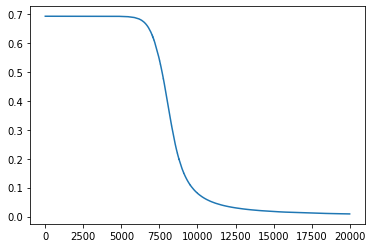

In [ ]:
### Write your code here
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])
xor_net = TwoLayerNet(2, 5, 2)
h = xor_net.train(X_xor, y_xor, X_xor, y_xor, batch_size = 4, num_iters = 20000, learning_rate = 0.01)
import matplotlib.pyplot as plt
plt.plot(h['loss_history'])
print(h['loss_history'][-10:])
xor_net.predict(X_xor)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

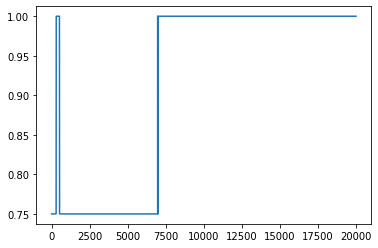

In [ ]:
plt.plot(h['val_acc_history'])
h['val_acc_history'][-10:]

### Iris
Use TwoLayerNet to train the iris dataset. Choose 120 samples randomly for training and the rest for testing

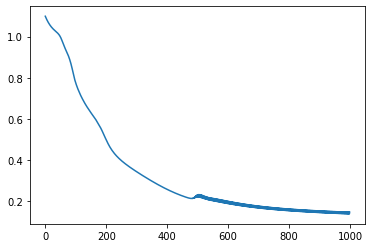

In [ ]:
### Write your code here
### Write your code here
from sklearn.datasets import load_iris
iris = load_iris()
random_indices = np.arange(150)
np.random.shuffle(random_indices)
X_iris = iris['data'][random_indices[:120]]
y_iris = iris['target'][random_indices[:120]]
X_iris_val = iris['data'][random_indices[120:]]
y_iris_val = iris['target'][random_indices[120:]]
iris_net = TwoLayerNet(4, 64, 3)
h = iris_net.train(X_iris, y_iris, X_iris_val, y_iris_val, num_iters = 1000, batch_size = 20, learning_rate = 0.05)
plt.plot(h['loss_history'])


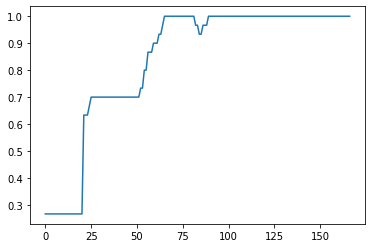

In [ ]:
plt.plot(h['val_acc_history'])

### Advanced
Add weight regularization to the loss and rewrite backprop part of TwoLayerNet. <br>
Train using some datasets and see if regularized network performs better than its older counterpart.
<br>
The expression for loss with regularization is as follows - <br>
$L = -\sum{t_i \log{p_i}} + \lambda(|w_1|^2 + |w_2|^2)$ <br>
$\lambda$ is a tunable hyper-parameter  denoting strength of regularization. <br>
If it is too high, network will struggle to fit, and if it is too low, network will overfit.

In [ ]:
### Write your code here